[IPython Notebook](beaming_boosting.ipynb) |  [Python Script](beaming_boosting.py)

Beaming and Boosting
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Let's make our system so that the boosting effects will be quite noticeable.

In [3]:
b['requiv@primary'] = 1.8
b['requiv@secondary'] = 0.96

b['teff@primary'] = 10000
b['gravb_bol@primary'] = 1.0
b['teff@secondary'] = 5200
b['gravb_bol@secondary'] = 0.32

b['q@binary'] = 0.96/1.8
b['incl@binary'] = 88

b['period@binary'] = 1.0
b['sma@binary'] = 6.0

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol=1.00 might be a better approx than gravb_bol=0.32.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irra


We'll add lc, rv, and mesh datasets so that we can see how they're each affected by beaming and boosting.

In [4]:
times = np.linspace(0,1,101)

In [5]:
b.add_dataset('lc', times=times, dataset='lc01')

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


<ParameterSet: 15 parameters | contexts: compute, dataset>

In [6]:
b.add_dataset('rv', times=times, dataset='rv01')

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


<ParameterSet: 15 parameters | contexts: compute, dataset>

In [7]:
b.add_dataset('mesh', times=times[::10], dataset='mesh01', columns=['boost_factors@lc01'])

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.
Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


<ParameterSet: 4 parameters | contexts: compute, dataset>

Relevant Parameters
---------------------------------

In [8]:
b.set_value('irrad_method', 'none')

Fri, 05 Oct 2018 14:03 PARAMETERS   WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


In [9]:
print b['boosting_method@compute']

Parameter: boosting_method@phoebe01@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



In [10]:
print b['boosting_method@compute'].choices

['none', 'linear']


Influence on Light Curves (fluxes)
----------------------------

In [11]:
b.run_compute(boosting_method='none', model='boosting_none')

Fri, 05 Oct 2018 14:03 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.


<ParameterSet: 74 parameters | kinds: rv, mesh, lc>

In [12]:
b.run_compute(boosting_method='linear', model='boosting_linear')

Fri, 05 Oct 2018 14:03 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which irrad_frac_refl_bol=1.00 might be a better approx than irrad_frac_refl_bol=0.60.


<ParameterSet: 74 parameters | kinds: rv, mesh, lc>

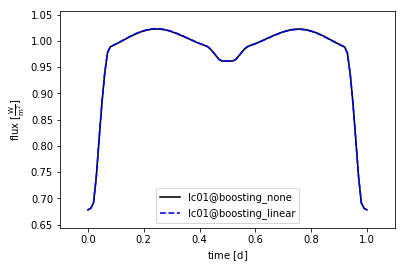

In [13]:
afig, mplfig = b['lc01'].plot(show=True, legend=True)

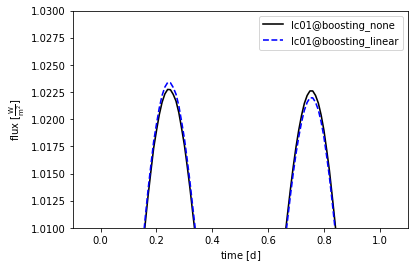

In [14]:
afig, mplfig = b['lc01'].plot(ylim=(1.01,1.03), show=True, legend=True)

Influence on Radial Velocities
---------------------

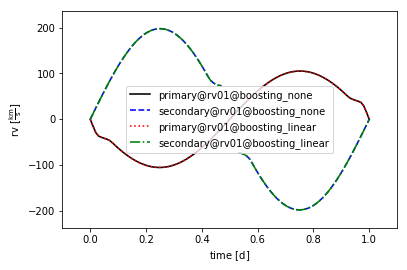

In [15]:
afig, mplfig = b['rv01@model'].plot(show=True, legend=True)

Influence on Meshes
-------------------------

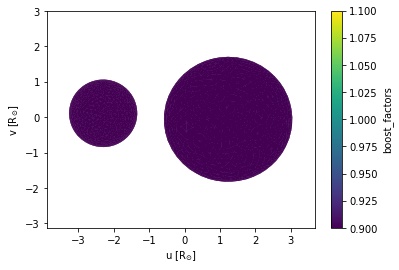

In [16]:
afig, mplfig = b['mesh@boosting_none'].plot(time=0.6, fc='boost_factors', ec='none', show=True)

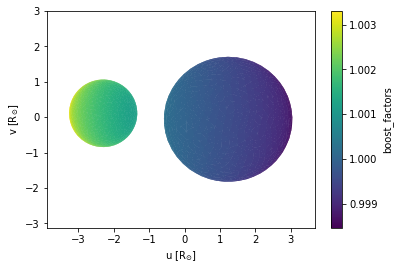

In [17]:
afig, mplfig = b['mesh@boosting_linear'].plot(time=0.6, fc='boost_factors', ec='none', show=True)